In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'Fraud_check.csv')

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Taxable.Income'>

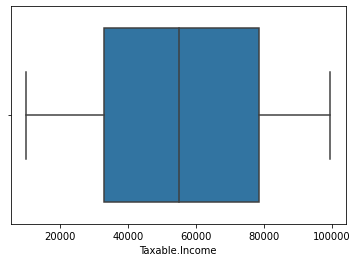

In [8]:
sns.boxplot(df['Taxable.Income'])

<AxesSubplot:xlabel='City.Population'>

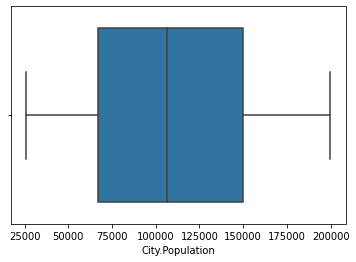

In [9]:
sns.boxplot(df['City.Population'])

<AxesSubplot:xlabel='Work.Experience'>

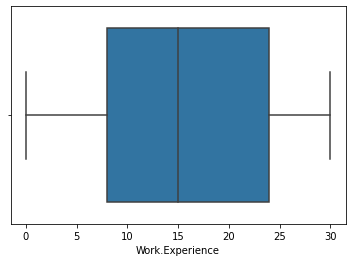

In [10]:
sns.boxplot(df['Work.Experience'])

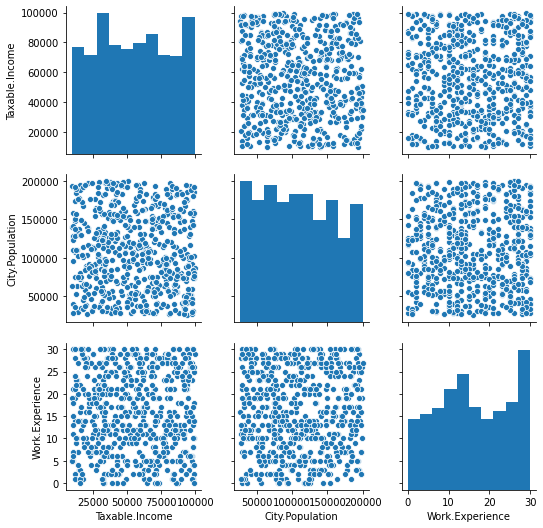

In [11]:
sns.pairplot(df)

In [12]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


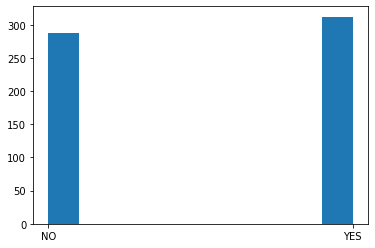

In [13]:
#Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population','Work.Experience', 'Urban'])
#check catagorical var
plt.figure(figsize=(6,4))
plt.hist(df['Undergrad'],rwidth=10)
plt.show()
#Undergrad=pd.Series(df['Undergrad'])

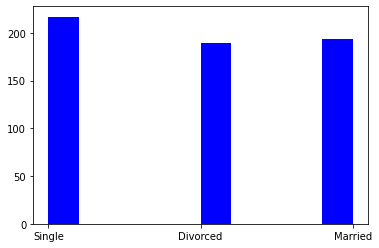

In [14]:
plt.figure(figsize=(6,4))
plt.hist(df['Marital.Status'],rwidth=10,color='b')
plt.show()

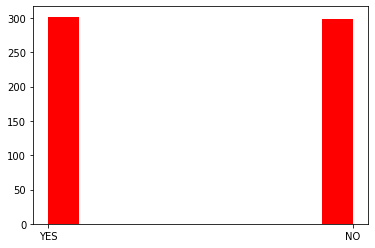

In [15]:
plt.figure(figsize=(6,4))
plt.hist(df['Urban'],rwidth=10,color='r')
plt.show()

In [16]:
df_process=df.copy()  #create copy of data set

In [17]:
df_process= pd.get_dummies(df_process, drop_first=True)

In [18]:
df_process

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


# Taxable_Income <= 30000 as “Risky=0” and others are “Good=1”

In [19]:
df_process['Taxable.Income'] = [ 0 if i<=30000 else 1 for i in df_process['Taxable.Income']]

In [20]:
df_process

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,1,50047,10,0,0,1,1
1,1,134075,18,1,0,0,1
2,1,160205,30,0,1,0,1
3,1,193264,15,1,0,1,1
4,1,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,1,39492,7,1,0,0,1
596,1,55369,2,1,0,0,1
597,1,154058,0,0,0,0,1
598,1,180083,17,1,1,0,0


# Remove_Outliers

In [21]:
from sklearn.ensemble import IsolationForest

In [22]:
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(df_process)

IsolationForest(contamination=0.01, random_state=10)

In [23]:
# predictions
x_pred_outliers = clf.predict(df_process)

In [24]:
x_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [25]:
df_process['anomaly']=clf.predict(df_process.iloc[:,0:8])

In [26]:
df_process

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,anomaly
0,1,50047,10,0,0,1,1,1
1,1,134075,18,1,0,0,1,1
2,1,160205,30,0,1,0,1,1
3,1,193264,15,1,0,1,1,1
4,1,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,1,39492,7,1,0,0,1,1
596,1,55369,2,1,0,0,1,1
597,1,154058,0,0,0,0,1,1
598,1,180083,17,1,1,0,0,1


In [27]:
df_process[df_process.anomaly ==-1]

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,anomaly
38,0,177575,3,0,0,1,0,-1
259,0,197841,7,0,1,0,0,-1
280,0,33184,1,0,0,0,0,-1
356,0,46480,27,0,1,0,0,-1
517,0,195078,26,0,0,1,0,-1
541,0,191874,30,1,0,0,1,-1


In [28]:
df_process= df_process.drop(df_process.index[[38,259,280,356,517,541]],axis=0).reset_index()

In [29]:
df_process

,index,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,anomaly
0,0,1,50047,10,0,0,1,1,1
1,1,1,134075,18,1,0,0,1,1
2,2,1,160205,30,0,1,0,1,1
3,3,1,193264,15,1,0,1,1,1
4,4,1,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
589,595,1,39492,7,1,0,0,1,1
590,596,1,55369,2,1,0,0,1,1
591,597,1,154058,0,0,0,0,1,1
592,598,1,180083,17,1,1,0,0,1


In [30]:
df_process= df_process.drop(['index', 'anomaly'], axis=1)

In [31]:
df_process

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,1,50047,10,0,0,1,1
1,1,134075,18,1,0,0,1
2,1,160205,30,0,1,0,1
3,1,193264,15,1,0,1,1
4,1,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
589,1,39492,7,1,0,0,1
590,1,55369,2,1,0,0,1
591,1,154058,0,0,0,0,1
592,1,180083,17,1,1,0,0


In [32]:
from sklearn.preprocessing import  MinMaxScaler
scallar= MinMaxScaler()


In [33]:
x=df_process.iloc[:,1:]
y= df_process.iloc[:,0]

In [34]:
y

0      1
1      1
2      1
3      1
4      1
      ..
589    1
590    1
591    1
592    1
593    1
Name: Taxable.Income, Length: 594, dtype: int64

In [35]:
#x= scallar.fit_transform(x)

In [36]:
x

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
589,39492,7,1,0,0,1
590,55369,2,1,0,0,1
591,154058,0,0,0,0,1
592,180083,17,1,1,0,0


# To Check whether the data4 is balanced or imbalanced

In [37]:
df_process['Taxable.Income'].value_counts()

1    476
0    118
Name: Taxable.Income, dtype: int64

In [38]:
print("% of Good's in Taxable.Income:",(476/(476+118))*100)
print("% of Risky's in Taxable.Income:",(118/(476+118))*100)

% of Good's in Taxable.Income: 80.13468013468014
% of Risky's in Taxable.Income: 19.865319865319865


In [39]:
a =pd.Series(df_process['Taxable.Income']).value_counts()

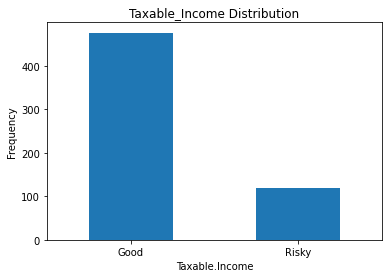

In [40]:
a.plot(kind='bar',rot=0)
plt.title("Taxable_Income Distribution")
LABELS = ["Good", "Risky"]
plt.xticks(range(2), LABELS)
plt.xlabel("Taxable.Income")
plt.ylabel("Frequency")
plt.show()

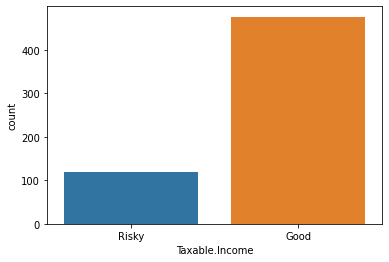

In [41]:
# visualize the target variable
g = sns.countplot(df_process['Taxable.Income'])
g.set_xticklabels(["Risky","Good"])
plt.show()

In [42]:
#!pip install -U imbalanced-learn
#import imblearn

In [43]:
#Random over-sampling with imblearn
from imblearn.over_sampling import RandomOverSampler

In [44]:
os =  RandomOverSampler(random_state=0)

In [45]:
X_new_res, y_new_res = os.fit_resample(x,y)

In [46]:
X_new_res.shape,y_new_res.shape

((952, 6), (952,))

In [47]:
from collections import Counter
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_new_res))

Original dataset shape Counter({1: 476, 0: 118})
Resample dataset shape Counter({1: 476, 0: 476})


In [48]:
x_scalled=scallar.fit_transform(X_new_res)   #scalling data
y_s=y_new_res

# Split data into train-test split

In [49]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x_scalled, y_s , test_size=0.2, random_state=100)

In [50]:
Xtrain.shape, Xtest.shape,ytrain.shape,ytest.shape

((761, 6), (191, 6), (761,), (191,))

# Building Random Forest Classifier using Entropy Criteria

In [51]:
# Building Random Forest Classifier using Entropy Criteria
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200,max_depth=10,min_samples_split=20,criterion='entropy',max_features=3)
classifier.fit(Xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=3,
                       min_samples_split=20, n_estimators=200)

In [52]:
pred = classifier.predict(Xtest)
pd.Series(pred).value_counts() 

0    109
1     82
dtype: int64

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [54]:
acc = accuracy_score(ytest, pred) * 100
print("Accuracy =", acc)
confusion_matrix(ytest, pred)

Accuracy = 80.6282722513089


array([[84, 12],
       [25, 70]], dtype=int64)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        96
           1       0.85      0.74      0.79        95

    accuracy                           0.81       191
   macro avg       0.81      0.81      0.81       191
weighted avg       0.81      0.81      0.81       191



In [56]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
print('ROCAUC score:',roc_auc_score(ytest, pred))

ROCAUC score: 0.805921052631579


# Building Random Forest Classifier using Gini Criteria

In [57]:
classifier_gini2 = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=20,criterion='gini',max_features=3,random_state =1)
classifier_gini2.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=10, max_features=3, min_samples_split=20,
                       random_state=1)

In [58]:
pred2 = classifier_gini2.predict(Xtest)     # Predicted Data
pd.Series(pred2).value_counts() 

0    109
1     82
dtype: int64

In [59]:
acc = accuracy_score(ytest, pred2) * 100
print("Accuracy =", acc)
confusion_matrix(ytest, pred2)

Accuracy = 78.53403141361257


array([[82, 14],
       [27, 68]], dtype=int64)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80        96
           1       0.83      0.72      0.77        95

    accuracy                           0.79       191
   macro avg       0.79      0.78      0.78       191
weighted avg       0.79      0.79      0.78       191



In [61]:
print('ROCAUC score:',roc_auc_score(ytest, pred2))

ROCAUC score: 0.7849780701754385


# Grid Search CV

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state = 1)
estimator = model
n_estimators = {'n_estimators':[100, 300, 400, 700, 500, 800, 1200]}
criterion = {'criterion':['entropy','gini']}
max_depth = {'max_depth':[5, 8, 15, 25, 30]}
min_samples_split = {'min_samples_split':[2, 5, 10, 15, 100]}


In [63]:
clf = GridSearchCV(estimator, n_estimators, cv = 8, verbose = 1,n_jobs = -1)
clf.fit(x_scalled, y_s )
print(clf.best_score_)
print(clf.best_params_)

Fitting 8 folds for each of 7 candidates, totalling 56 fits
0.9086134453781514
{'n_estimators': 700}


In [64]:
clf1= GridSearchCV(estimator, criterion, cv = 8, verbose = 1,n_jobs = -1)
clf1.fit(x_scalled, y_s)
print(clf1.best_score_)
print(clf1.best_params_)

Fitting 8 folds for each of 2 candidates, totalling 16 fits
0.9033613445378151
{'criterion': 'gini'}


In [65]:
clf2 = GridSearchCV(estimator, max_depth, cv = 8, verbose = 1,n_jobs = -1)
clf2.fit(x_scalled, y_s)
print(clf2.best_score_)
print(clf2.best_params_)

Fitting 8 folds for each of 5 candidates, totalling 40 fits
0.9033613445378151
{'max_depth': 25}


In [66]:
clf3 = GridSearchCV(estimator,min_samples_split, cv = 8, verbose = 1,n_jobs = -1)
clf3.fit(x_scalled, y_s )
print(clf3.best_score_)
print(clf3.best_params_)

Fitting 8 folds for each of 5 candidates, totalling 40 fits
0.9033613445378151
{'min_samples_split': 2}


In [67]:
clf.best_params_,clf1.best_params_,clf2.best_params_,clf3.best_params_

({'n_estimators': 700},
 {'criterion': 'gini'},
 {'max_depth': 25},
 {'min_samples_split': 2})

In [68]:
#use this data for cross validationn

In [69]:
classifier_gini_grid = RandomForestClassifier(n_estimators=700,max_depth=25,min_samples_split=2,criterion='gini',max_features=3,random_state =1)
classifier_gini_grid.fit(Xtrain, ytrain)
pred2 = classifier_gini_grid.predict(Xtest)     # Predicted Data
#pd.Series(pred2).value_counts() 
acc = accuracy_score(ytest, pred2) * 100
print("Accuracy =", acc)
print('ROCAUC score:',roc_auc_score(ytest, pred2))
confusion_matrix(ytest, pred2)


Accuracy = 90.0523560209424
ROCAUC score: 0.9000548245614034


array([[95,  1],
       [18, 77]], dtype=int64)

# Model Validation

In [70]:
# 1.Evaluate using a train and a test set

model =RandomForestClassifier(n_estimators=700,max_depth=25,min_samples_split=2,criterion='gini',max_features=3)
model.fit(Xtrain,ytrain)
result = model.score(Xtest,ytest)
result*100

91.09947643979058

In [71]:
# 2.Evaluate using Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds =10
seed = 200

kfold = KFold(n_splits=num_folds, random_state=None)
model2 = RandomForestClassifier(n_estimators=700,max_depth=25,min_samples_split=2,criterion='gini',max_features=3,random_state =1)
results = cross_val_score(model2, x_scalled, y_s, cv=kfold)

print(results.mean()*100.0)
print(results.std()*100)

90.35307017543859
7.278273546147995


In [ ]:
# Evaluate using Leave One Out Cross Validation

from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
model3 = RandomForestClassifier(n_estimators=700,max_depth=25,min_samples_split=2,criterion='gini',max_features=3,random_state =1)
results = cross_val_score(model3, x_scalled, y_s, cv=loocv)

print(results.mean()*100.0)
print(results.std()*100)